수강생분의 이름과 학번을 입력해주세요.

In [106]:
print("이혜림", "20211924")

이혜림 20211924


구글 드라이브 연결

In [107]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


작업폴더 경로 설정

In [108]:
workspace_path = '/gdrive/My Drive/Colab Notebooks/AI/AI_week4'  # 과제 파일 업로드한 경로 반영

In [109]:
random_state = 0  # 실험결과 재현을 위해 random_state(seed) 고정

# 1. 회귀 평가지표

In [110]:
import numpy as np
# MAE, MSE, MSLE, R2 임포트
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실제값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)

# 출력
print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


# 2. 피처 스케일링

## 2.1. min-max 정규화

In [111]:
import pandas as pd

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [112]:
from sklearn.preprocessing import MinMaxScaler

# min-max 정규화 객체 생성
scaler = MinMaxScaler()

# min-max 정규화 적용
scaler.fit(df)
df_scaled = scaler.transform(df)

print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


## 2.2. 표준화

In [113]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 표준화 적용
df_scaled = scaler.fit_transform(df)

print(df_scaled)
print(df_scaled.mean(), df_scaled.std())

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]
-4.255854927729767e-16 1.0


# 3. 교차 검증

## 3.1. K 폴드 교차 검증

In [114]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

folds = KFold(n_splits=5, shuffle=False)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9], 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7], 검증 데이터: [8 9]


In [115]:
folds = KFold(n_splits=5, shuffle=True, random_state=random_state)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [0 1 3 4 5 6 7 9], 검증 데이터: [2 8]
훈련 데이터: [0 1 2 3 5 6 7 8], 검증 데이터: [4 9]
훈련 데이터: [0 2 3 4 5 7 8 9], 검증 데이터: [1 6]
훈련 데이터: [0 1 2 4 5 6 8 9], 검증 데이터: [3 7]
훈련 데이터: [1 2 3 4 6 7 8 9], 검증 데이터: [0 5]


## 3.2. 층화(Stratified) K 폴드 교차 검증

In [116]:
y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True, random_state=random_state) # K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [117]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5) # '층화' K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



# 4. 선형 회귀

## 4.1. 선형 회귀 모델

### 4.1.1. 데이터 생성

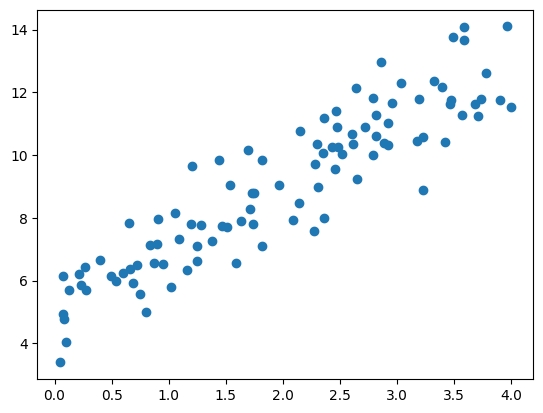

In [118]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(random_state) # 시드값 고정

w0 = 5 # y절편
w1 = 2 # 회귀 계수
noise = np.random.randn(100, 1) # 노이즈

x = 4 * np.random.rand(100, 1) # 0 ~ 4 사이 실수값 100개 생성 (x값)
y = w1*x + w0 + noise # y값

plt.scatter(x, y);

### 4.1.2. 모델 훈련

In [119]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression() # 선형 회귀 모델
linear_reg_model.fit(x, y) # 모델 훈련

print('y절편(w0):', linear_reg_model.intercept_)
print('회귀계수(w1):', linear_reg_model.coef_)

y절편(w0): [5.09772262]
회귀계수(w1): [[1.9808382]]


### 4.1.3. 회귀선 확인

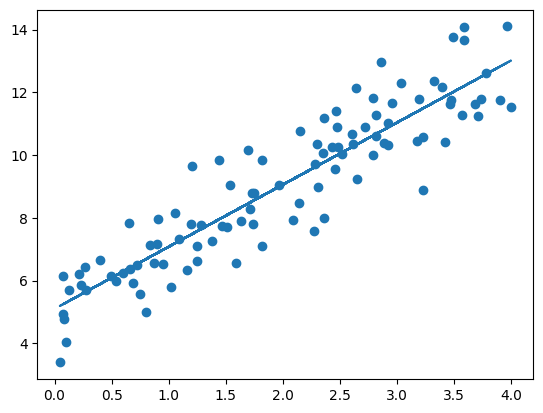

In [120]:
y_pred = linear_reg_model.predict(x) # 예측

plt.scatter(x, y)
plt.plot(x, y_pred); # 선형 회귀선 그리기

# 5. 결정 트리(Decision Tree)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
cancer_data = load_breast_cancer()
# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'],
                                                cancer_data['target'],
                                                stratify=cancer_data['target'],
                                                test_size=0.4,
                                                random_state=random_state)

decisiontree = DecisionTreeClassifier(random_state=random_state) # 결정 트리 정의
decisiontree.fit(X_train, y_train) # 모델 훈련

accuracy = decisiontree.score(X_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 결정 트리 모델 정확도 출력
print(f'결정 트리 정확도: {accuracy:.3f}')

결정 트리 정확도: 0.939


# 6. 랜덤 포레스트(Random Forest)

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
cancer_data = load_breast_cancer()
# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'],
                                                cancer_data['target'],
                                                stratify=cancer_data['target'],
                                                test_size=0.4,
                                                random_state=random_state)

randomforest = RandomForestClassifier(random_state=random_state) # 랜덤 포레스트 정의
randomforest.fit(X_train, y_train) # 모델 훈련

accuracy = randomforest.score(X_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 랜덤 포레스트 모델 정확도 출력
print(f'랜덤 포레스트 정확도: {accuracy:.3f}')

랜덤 포레스트 정확도: 0.943


# 7. 베이지안 최적화(Bayesian Optimization)

In [123]:
# 베이지안 최적화 패키지 설치
!pip install bayesian-optimization

## 7.1. 하이퍼 파라미터 탐색 범위 설정

In [124]:
# 하이퍼 파라미터 범위 (딕셔너리 형태)
param_bounds = {'x': (-1, 5),
                'y': (0, 4)}

## 7.2. 평가지표 계산 함수 정의

In [125]:
def eval_function(x, y):
    return -x ** 2 - (y - 2) ** 2 + 10

## 7.3. 베이지안 최적화 객체 생성

In [126]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=random_state)

## 7.4. 최적화 수행

In [127]:
# 베이지안 최적화 수행 (maximize: 평가결과가 최대가 되도록 최적화)
optimizer.maximize(init_points=2, n_iter=10)  # 평가점수 최대값 달성 시 'pink' 표시

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 4.002     | 2.293     | 2.861     |
| 2         | 3.121     | 2.617     | 2.18      |
| 3         | 3.832     | 2.327     | 2.869     |
| 4         | 4.596     | 2.171     | 2.832     |
| 5         | -6.227    | 3.989     | 2.559     |
| 6         | 9.467     | 0.3522    | 1.361     |
| 7         | 7.39      | -1.0      | 3.269     |
| 8         | 5.0       | -1.0      | 0.0       |
| 9         | 3.841     | 1.469     | 0.0       |
| 10        | 8.966     | -1.0      | 1.817     |
| 11        | 9.737     | 0.1806    | 2.48      |
| 12        | 5.785     | 0.4638    | 4.0       |


## 7.5. 최적 파라미터 출력

In [128]:
# 평가점수가 최대일 때 타깃, x, y 값 출력
optimizer.max

{'target': 9.73708754050397,
 'params': {'x': 0.18063747442587866, 'y': 2.4798776535004214}}

# 8. 선형회귀 예시

## 8.1 라이브러리 및 데이터 불러오기

In [129]:
import pandas as pd

In [130]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

In [131]:
data  = pd.read_csv(file_url)

## 8.2 데이터 확인하기

In [132]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [133]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [135]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [136]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


## 8.3 전처리: 학습셋과 실험셋 나누기

In [137]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)  # 실험결과 재현을 위해 random_state 고정

## 8.4 모델링

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
model = LinearRegression()

In [142]:
model.fit(X_test, y_test)

LinearRegression()

## 8.5 모델을 활용해 예측하기

In [143]:
pred = model.predict(X_test)

## 8.6 예측 모델 평가하기

In [144]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [145]:
comparison

,actual,pred
578,9724.53000,11243.080933
610,8547.69130,10331.777062
569,45702.02235,39118.812907
1034,12950.07120,15654.035466
198,9644.25250,6991.283772
...,...,...
1084,15019.76005,15360.947644
726,6664.68595,7729.907803
1132,20709.02034,15217.387886
725,40932.42950,35202.903336


In [146]:
import matplotlib.pyplot as plt # ❶
import seaborn as sns # ❷

<Axes: xlabel='actual', ylabel='pred'>

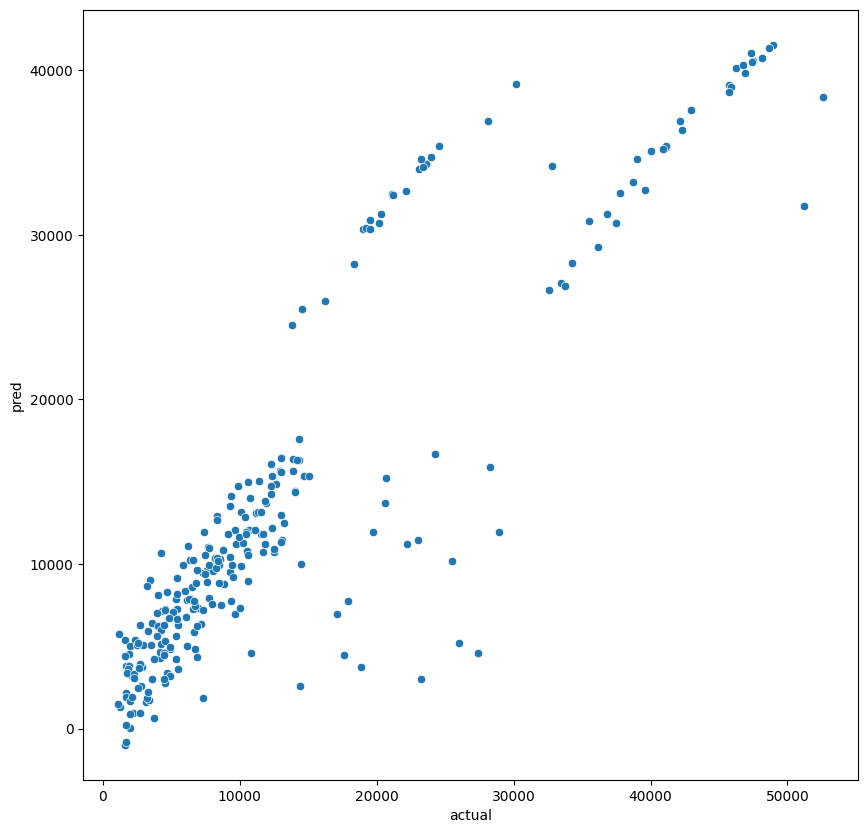

In [147]:
plt.figure(figsize=(10,10)) # ❶ 그래프 크기를 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # ❷

In [148]:
from sklearn.metrics import mean_squared_error # ❶
mean_squared_error(y_test, pred) ** 0.5 # ❷

5628.3804160942445

In [149]:
mean_squared_error(y_test, pred, squared = False)

5628.3804160942445

In [150]:
model.score(X_test, y_test)

0.8009258241125808

## 8.7 이해하기 : 선형 회귀 (Linear Regression)

In [151]:
model.coef_

array([  265.62718492,  -690.23456003,   329.40061021,   674.18712226,
       24849.81626667])

In [152]:
pd.Series(model.coef_, index = X.columns)

age           265.627185
sex          -690.234560
bmi           329.400610
children      674.187122
smoker      24849.816267
dtype: float64

In [153]:
model.intercept_

-12501.383673580169

# 실습 과제
## data.csv 파일을 읽어서 아래의 순서대로 선형회귀 분석하시오.

*   1) data.csv 데이터 불러오기
*   2) 데이터 확인하기: 전체 데이터프레임 출력, head(), info(), describe() 출력
*   3) 전처리: 학습셋과 실험셋 나누기, test_size=0.2, random_state=0
*   4) 모델링
*   5) 모델을 활용해 예측하기
*   6) 예측 모델 평가하기
*   7) 선형 회귀선 확인: 데이터는 'red'색으로 scatter 시각화, 회귀선은 'blue'색으로 시각화

## 유의사항은 아래와 같다.

*   1) 데이터 X, 정답 Y는 아래의 코드를 사용하시오.
```
X = data['sqft_living']
y = data['price']
```

*   2) 선형회귀 모델 학습 전에 아래의 numpy array shape 변경(1차원 배열 -> 2차원 배열)하시오.
```
X_train = np.asarray(X_train).reshape(-1, 1)
X_test = np.asarray(X_test).reshape(-1, 1)
model.fit(X_train, y_train)  # 선형회귀 모델 학습
```


## 1. 데이터 불러오기

In [154]:
import pandas as pd
import os

In [155]:
file_url = os.path.join(workspace_path, 'data.csv')  # data.csv 파일 경로 설정

In [156]:
# data.csv 불러와서 data 데이터프레임 생성
data = pd.read_csv(file_url)

## 2. 데이터 확인하기: 전체 데이터프레임 출력, head(), info(), describe() 출력

In [157]:
# 전체 데이터프레임 출력
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [158]:
# head() 출력
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [159]:
# info() 출력
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [160]:
# describe() 출력
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. 전처리: 학습셋과 실험셋 나누기, test_size=0.2, random_state=0

In [161]:
# X, Y 정의
X = data['sqft_living']
y = data['price']

In [162]:
print(X.shape, y.shape)

(21613,) (21613,)


In [163]:
# 학습셋과 실험셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [164]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290,) (4323,) (17290,) (4323,)


In [165]:
X_train = np.asarray(X_train).reshape(-1, 1)
X_test = np.asarray(X_test).reshape(-1, 1)

## 4. 모델링

In [166]:
# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5. 모델을 활용해 예측하기


In [167]:
# 학습한 모델로 X_test 예측
pred = model.predict(X_test)

## 6. 예측 모델 평가하기

In [168]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [169]:
comparison

,actual,pred
17384,297000.0,3.578180e+05
722,1578000.0,1.277876e+06
2680,562100.0,3.606577e+05
18754,631500.0,2.726274e+05
14554,780000.0,8.547629e+05
...,...,...
5427,844000.0,8.292058e+05
16547,335500.0,3.095433e+05
4585,369950.0,3.379402e+05
17762,300000.0,2.215131e+05


In [170]:
# MSE 계산(y_test, pred) 및 출력
MSE = mean_squared_error(y_test, pred)
print(f'MSE : {MSE}')

MSE : 61940787124.62475


<Axes: xlabel='actual', ylabel='pred'>

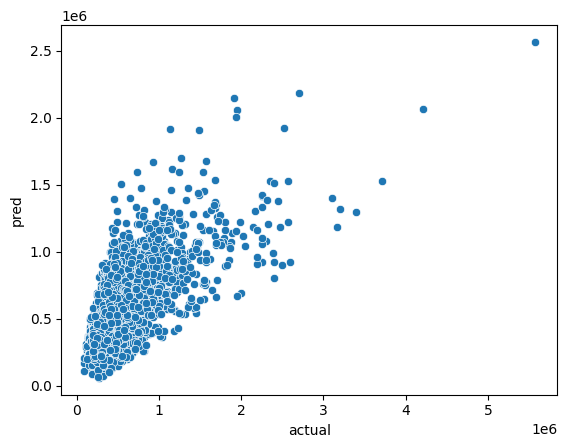

In [171]:
# scatter시각화: data = comparison
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

In [172]:
# 학습한 선형회귀 모델 score 출력
model.score(X_test, y_test)

0.47915772372653753

## 7. 선형 회귀선 확인: 데이터는 'red'색으로 scatter 시각화, 회귀선은 'blue'색으로 선그래프 시각화

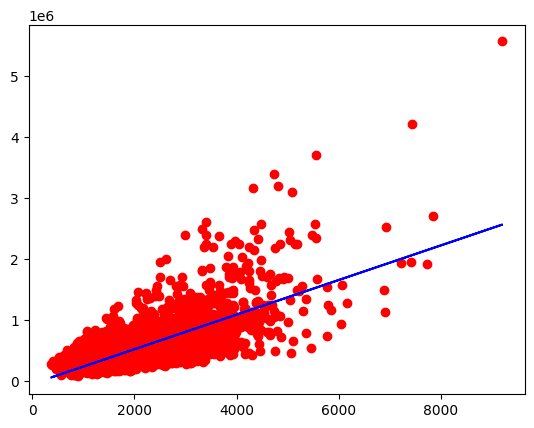

In [173]:
# 데이터 scatter, 선형 회귀선 출력
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, pred, color='b')